In [1]:
import keras
print(f"Keras Version: {keras.__version__}")
import tensorflow as tf
print(f"Tensorflow Version {tf.__version__}")

Using TensorFlow backend.


Keras Version: 2.0.4
Tensorflow Version 1.1.0


[Keras](https://keras.io/) is a high level wrapper (API) for Tensorflow and Theano which aims to make them easier to use. Tensorflow gets quite verbose and there is a lot of detail to handle, which Keras trys to abstract away to sane defaults, while allowing the option to tinker with the tensors where wanted.

# the data

To get a feel for Keras, I'm seeing how it goes with MNIST. 

Keras already has some [datasets included](https://keras.io/datasets/), so using the ever popular mnist:

> ** MNIST database of handwritten digits**

> Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Checking the data:

In [3]:
f"Shapes x_train: {x_train.shape}, y_train: {y_train.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}"

'Shapes x_train: (60000, 28, 28), y_train: (60000,), x_test: (10000, 28, 28), y_test: (10000,)'

The train and test images are `28x28` sized images, which we need to reshape into a 1d vector to make our super simple NN deal with. 

Now, it's a good idea to always eyeball the data, so here goes:

In [33]:
# min to max values in x_train
x_train.min(), x_train.max()

(0, 255)

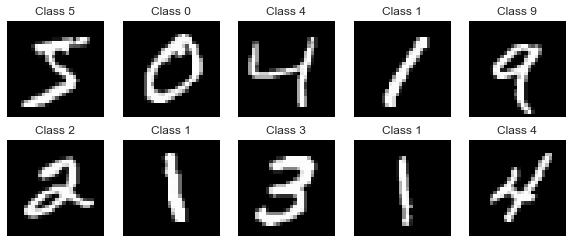

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Class {y_train[i]}")
    ax.set_xticks([]) , ax.set_yticks([]) 

In [129]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

ok, we've seen the data, but we need to preprocess it into a neural net friendly shape. 

## preprocessing the data

The image data is 60K `28x28` images, and the image test data is 10K `28x28` images. We want the number of images to stay the same, while the 28x28 should become 784. Since the data is just numpy arrays we can use [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html):

In [32]:
X_train = x_train.reshape(-1, 28*28)
X_test = x_test.reshape(-1, 28*28)
x_train.shape, X_train.shape, x_test.shape, X_test.shape

((60000, 28, 28), (60000, 784), (10000, 28, 28), (10000, 784))

that was easy! 

Now, often image data is normalized:

In [34]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train.min(), X_train.max()

(0.0, 1.0)

Moving on to the image labels:

the image labels are stored as a simple numpy array, with each entry telling us what number each corresponding drawing is. Since our NN will spit out a prediction of the likelyhood of what number the drawing is, our NN will work better with the y data [one hot encoded](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science).

In [35]:
print("Existing image labels")
print(f"y_train: {y_train[:10]} | y_test: {y_test[:10]}")

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print(f"Y_Train encoded: {Y_train[0]}")
print(f"Y_test encoded: {Y_test[0]}")

Existing image labels
y_train: [5 0 4 1 9 2 1 3 1 4] | y_test: [7 2 1 0 4 1 4 9 5 9]
Y_Train encoded: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Y_test encoded: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


so now our data is all ready to go!

# A simple neural net

In [135]:
EPOCHS = 20

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model = Sequential()

model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# we can either use part of the training set as validation data or provide a validation set
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=128, shuffle=True, validation_split=0.05)

#model.fit(X_train, Y_train, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test,Y_test))

Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 3s - loss: 0.5003 - acc: 0.8553 - val_loss: 0.1846 - val_acc: 0.9560
Epoch 2/20
57000/57000 [==============================] - 2s - loss: 0.2414 - acc: 0.9277 - val_loss: 0.1366 - val_acc: 0.9663
Epoch 3/20
57000/57000 [==============================] - 2s - loss: 0.1901 - acc: 0.9444 - val_loss: 0.1144 - val_acc: 0.9720
Epoch 4/20
57000/57000 [==============================] - 2s - loss: 0.1655 - acc: 0.9502 - val_loss: 0.1223 - val_acc: 0.9660
Epoch 5/20
57000/57000 [==============================] - 2s - loss: 0.1497 - acc: 0.9554 - val_loss: 0.1075 - val_acc: 0.9723
Epoch 6/20
57000/57000 [==============================] - 2s - loss: 0.1370 - acc: 0.9591 - val_loss: 0.0949 - val_acc: 0.9783
Epoch 7/20
57000/57000 [==============================] - 2s - loss: 0.1275 - acc: 0.9605 - val_loss: 0.0898 - val_acc: 0.9760
Epoch 8/20
57000/57000 [==============================] - 2s -

In [187]:
model.evaluate(X_test, Y_test, batch_size=256)

 7936/10000 [======================>.......] - ETA: 0s

[0.18269435272078807, 0.96789999999999998]

and viola, this super simple NN gets 97% accuracy!

In [137]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_40 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_41 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                650       
__________

In [138]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

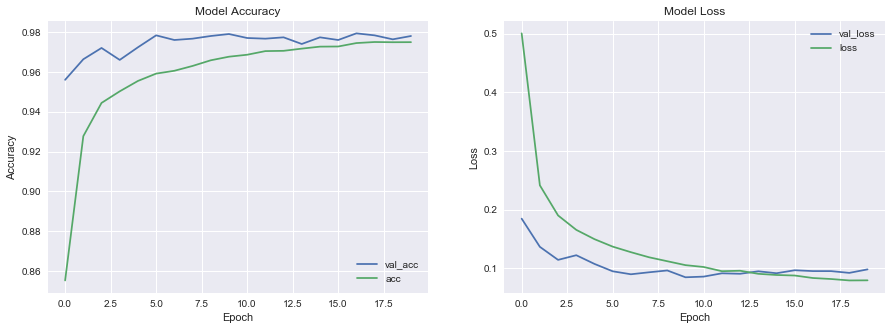

In [139]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

acc = axs[0]
acc.plot(history.history['val_acc'])
acc.plot(history.history['acc'])
acc.legend(['val_acc', 'acc'])
acc.set_title('Model Accuracy')
acc.set_ylabel('Accuracy')
acc.set_xlabel('Epoch')

loss = axs[1]
loss.plot(history.history['val_loss'])
loss.plot(history.history['loss'])
loss.legend(['val_loss', 'loss'])
loss.set_title('Model Loss')
loss.set_ylabel('Loss')
loss.set_xlabel('Epoch')
plt.show();

Now to to see how different hyperparameters affect the network:

In [188]:
b_size = [32,64,128]
history_runs = []

for b in b_size:
    print(f'Training on batchsize {b}')
    history_runs.append(model.fit(X_train, Y_train, epochs=10, batch_size=b, 
                                  shuffle=True, validation_data=(X_test,Y_test)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s - loss: 0.0630 - acc: 0.9837 - val_loss: 0.1848 - val_acc: 0.9702
Epoch 2/10
60000/60000 [==============================] - 8s - loss: 0.0630 - acc: 0.9845 - val_loss: 0.1986 - val_acc: 0.9692
Epoch 3/10
60000/60000 [==============================] - 7s - loss: 0.0640 - acc: 0.9839 - val_loss: 0.2022 - val_acc: 0.9696
Epoch 4/10
60000/60000 [==============================] - 7s - loss: 0.0630 - acc: 0.9839 - val_loss: 0.1963 - val_acc: 0.9689
Epoch 5/10
60000/60000 [==============================] - 8s - loss: 0.0673 - acc: 0.9833 - val_loss: 0.1947 - val_acc: 0.9701
Epoch 6/10
60000/60000 [==============================] - 8s - loss: 0.0743 - acc: 0.9826 - val_loss: 0.1872 - val_acc: 0.9681
Epoch 7/10
60000/60000 [==============================] - 8s - loss: 0.0671 - acc: 0.9837 - val_loss: 0.1920 - val_acc: 0.9704
Epoch 8/10
60000/60000 [==============================] - 8s 

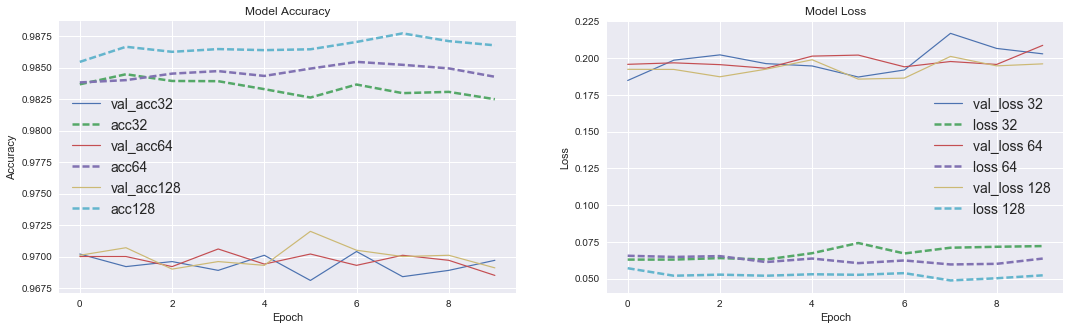

In [225]:
fig, axs = plt.subplots(1,2,figsize=(18,5))

acc_legend = []
loss_legend = []

for history, b in zip(history_runs, b_size):
    acc = axs[0]
    acc.plot(history.history['val_acc'], linewidth=1.2, label='val_acc'+ str(b))
    acc.plot(history.history['acc'], linestyle='--', linewidth=2.5, label='acc'+ str(b))
    acc.set_title('Model Accuracy')
    acc.set_ylabel('Accuracy')
    acc.set_xlabel('Epoch')
    
    loss = axs[1]
    loss.plot(history.history['val_loss'], linewidth=1.2, label='val_loss '+ str(b))
    loss.plot(history.history['loss'], linestyle='--', linewidth=2.5, label='loss '+ str(b))
    loss.set_title('Model Loss')
    loss.set_ylabel('Loss')
    loss.set_xlabel('Epoch')

acc.legend(fontsize=14)
loss.legend(fontsize=14)
plt.show();

that makes it easier to see the specific value for batch size, as well as a quick eyeball check on wether the network is over training - which it seems to be, since accuracy is going down and loss is going up at about epoch 6. 

A more complex parameter search would try out combinations of parameters, like different learning rates, play around with more parameters, but it depends on the problem, the computing time, and for a more thorough parameter search there are libraries like [grid search](http://scikit-learn.org/stable/modules/grid_search.html) and others like [hyperas](http://maxpumperla.github.io/hyperas/).  